In [ ]:
import yfinance as yahooFinance
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 11.4 MB/s eta 0:00:00


In [ ]:
from scipy.stats import norm, t
from arch import arch_model
from scipy.stats import gengamma
import yfinance as yahooFinance

In [ ]:
from scipy.stats import norm, t, gennorm, kurtosis, skew


In [ ]:
start = "2004-02-01"
end = '2024-09-08'

In [ ]:
SPX = yahooFinance.download('^GSPC', start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
returns_SPX = SPX.pct_change().dropna()

In [ ]:
returns_SPX_standardized = (returns_SPX - returns_SPX.mean()) / returns_SPX.std()

In [ ]:
from scipy.stats import skewnorm, genextreme

In [ ]:
np.random.seed(42)
num_samples = 100000

# Generate simulated data
normal_data = np.random.normal(loc=0, scale=1, size=num_samples)
skew_t_data = skewnorm.rvs(a=5, loc=0, scale=1, size=num_samples)  # Using skewnorm for skewed distribution
ged_data = genextreme.rvs(c=0.5, loc=0, scale=1, size=num_samples)

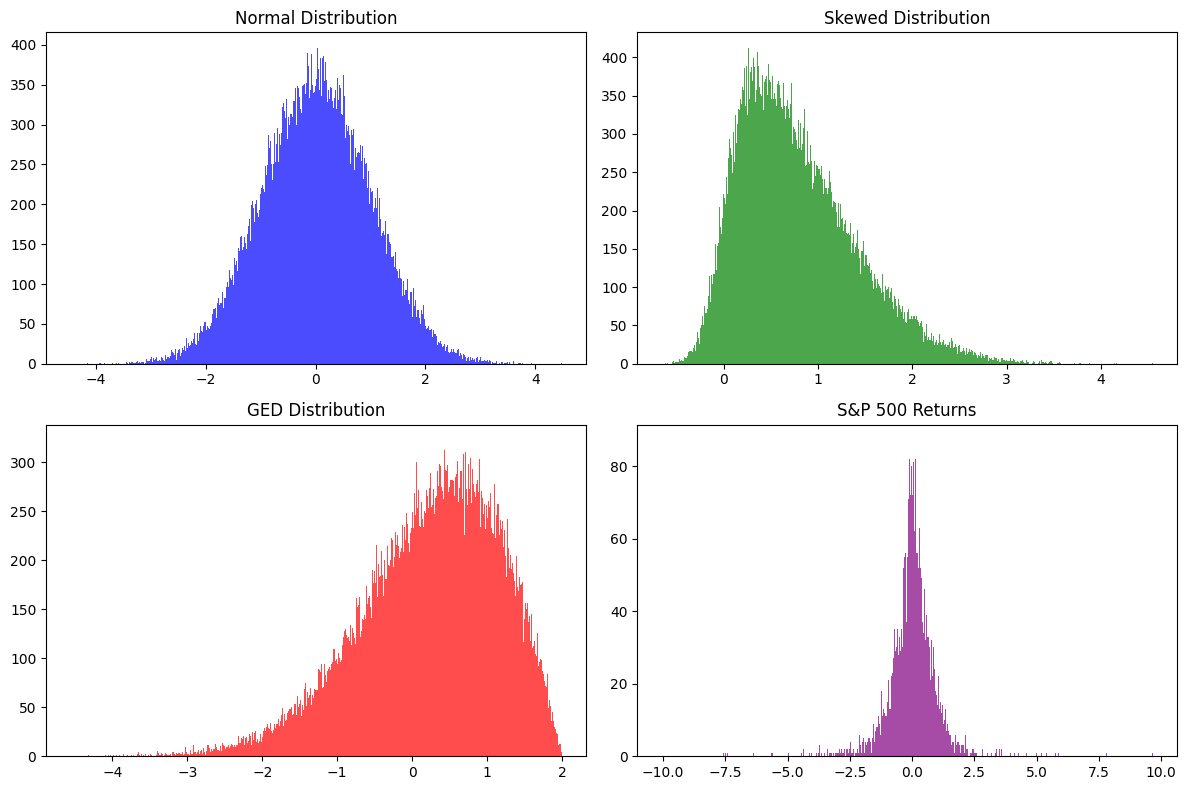

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for Normal Distribution
axs[0, 0].hist(normal_data, bins=1000, color='blue', alpha=0.7)
axs[0, 0].set_title('Normal Distribution')

# Histogram for Skewed Distribution (using skewnorm)
axs[0, 1].hist(skew_t_data, bins=1000, color='green', alpha=0.7)
axs[0, 1].set_title('Skewed Distribution')

# Histogram for GED
axs[1, 0].hist(ged_data, bins=1000, color='red', alpha=0.7)
axs[1, 0].set_title('GED Distribution')

# Histogram for S&P 500 Returns
axs[1, 1].hist(returns_SPX_standardized, bins=1000, color='purple', alpha=0.7)
axs[1, 1].set_title('S&P 500 Returns')

# Adjust layout
plt.tight_layout()
plt.show()

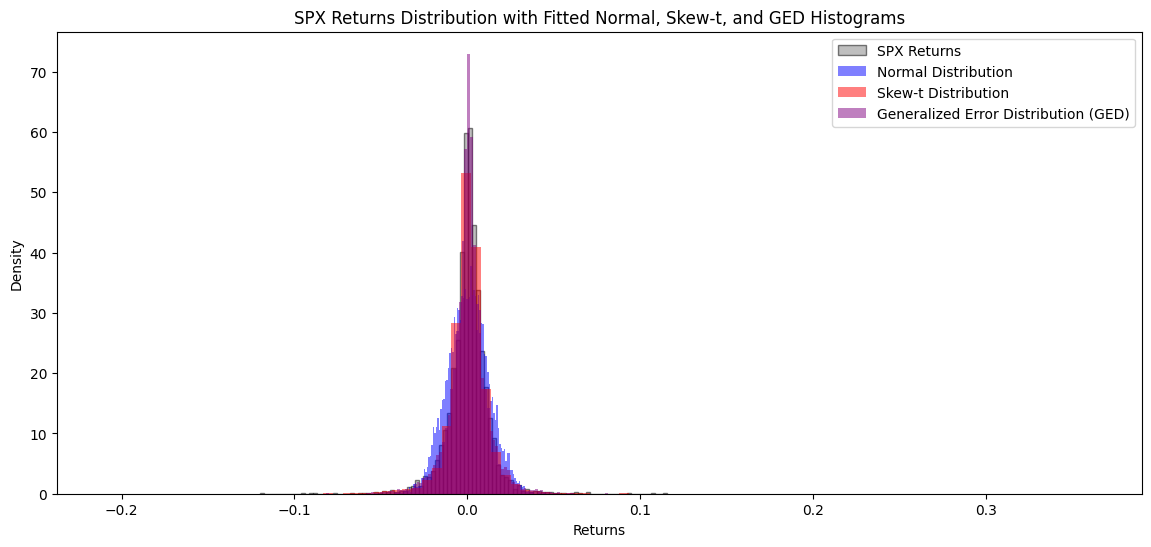

In [ ]:
plt.figure(figsize=(14, 6))
plt.hist(returns_SPX, bins=100, density=True, alpha=0.5, color='gray', edgecolor='black', label='SPX Returns')

# Step 4: Fit the normal distribution and generate random samples
mu, sigma = norm.fit(returns_SPX)
normal_samples = np.random.normal(mu, sigma, size=10000)
plt.hist(normal_samples, bins=100, density=True, alpha=0.5, color='blue', label='Normal Distribution')

# Step 5: Fit the skew-t distribution and generate random samples
df, loc, scale = t.fit(returns_SPX)
skew_t_samples = t.rvs(df, loc, scale, size=10000)
plt.hist(skew_t_samples, bins=100, density=True, alpha=0.5, color='red', label='Skew-t Distribution')

# Step 6: Fit the GED using gennorm and generate random samples
params_ged = gennorm.fit(returns_SPX)
ged_samples = gennorm.rvs(*params_ged, size=10000)
plt.hist(ged_samples, bins=100, density=True, alpha=0.5, color='purple', label='Generalized Error Distribution (GED)')

# Customize the plot
plt.title('SPX Returns Distribution with Fitted Normal, Skew-t, and GED Histograms')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

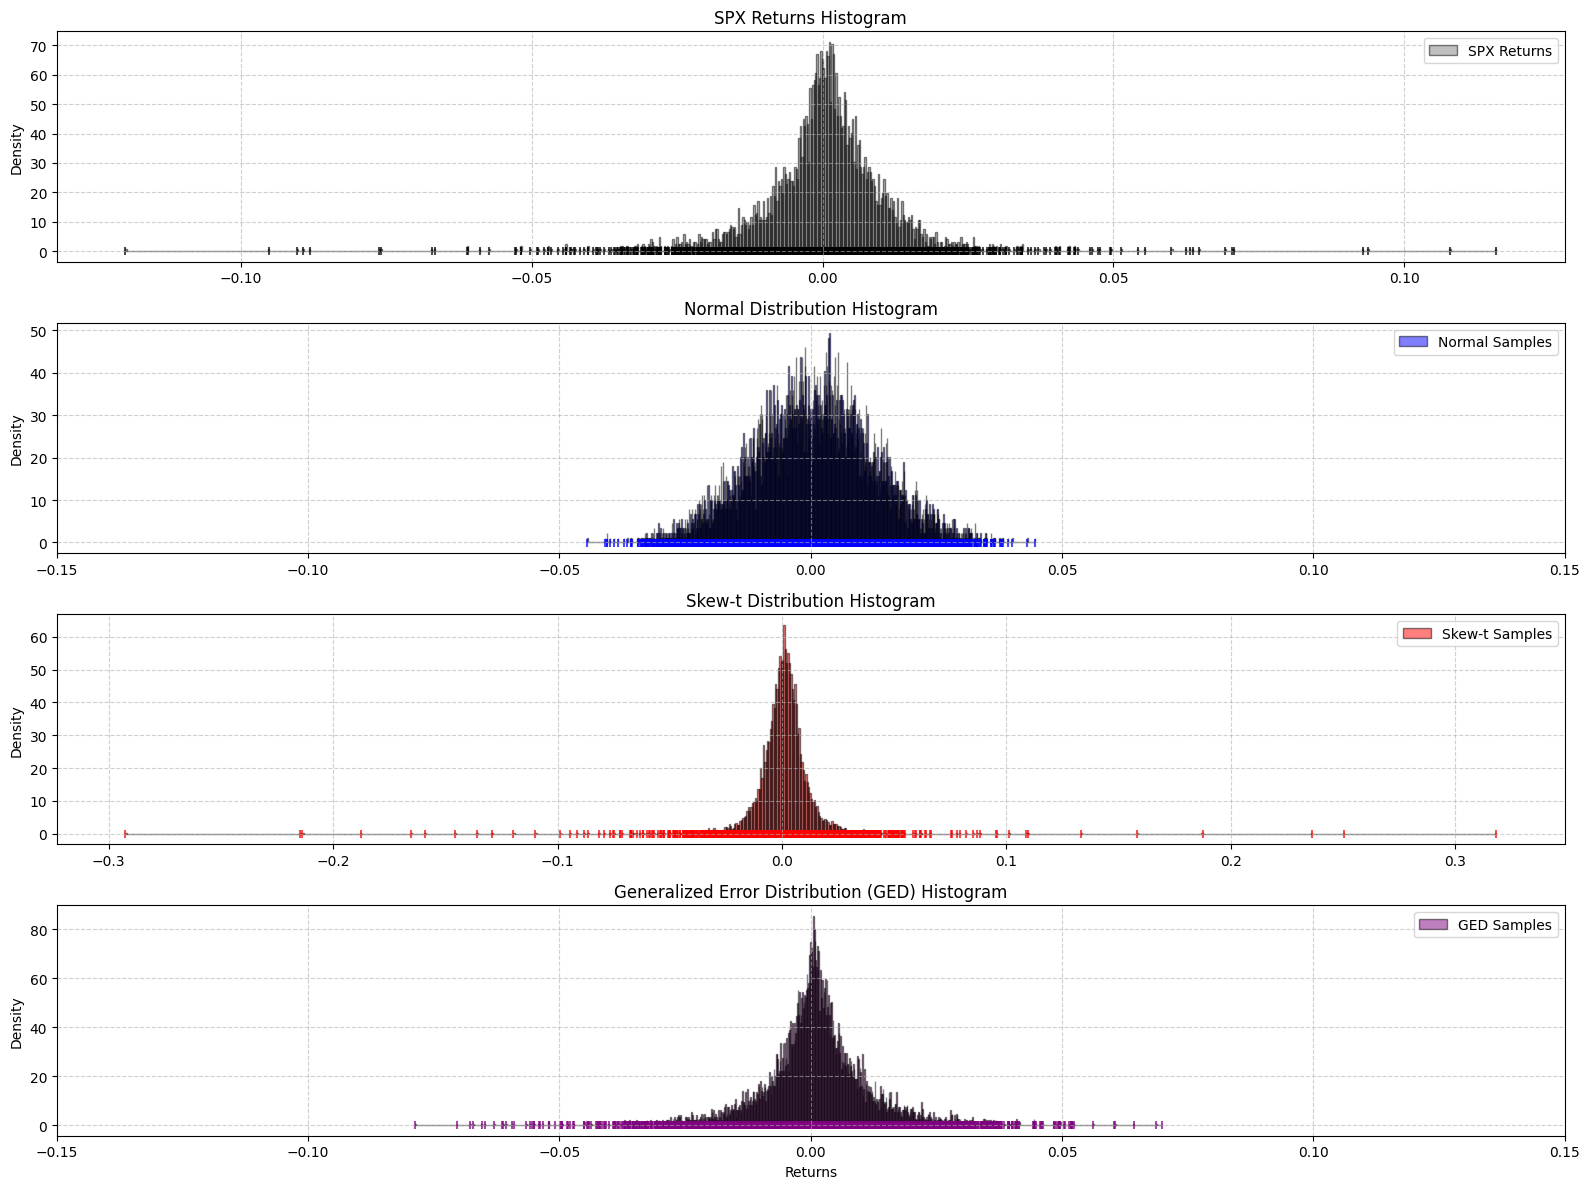

In [ ]:
mu, sigma = norm.fit(returns_SPX)
normal_samples = np.random.normal(mu, sigma, size=10000)

# Step 4: Fit the skew-t distribution
df, loc, scale = t.fit(returns_SPX)
skew_t_samples = t.rvs(df, loc, scale, size=10000)

# Step 5: Fit the GED using gennorm
params_ged = gennorm.fit(returns_SPX)
ged_samples = gennorm.rvs(*params_ged, size=10000)

# Generate x values for plotting the PDFs
x = np.linspace(returns_SPX.min(), returns_SPX.max(), 10000)

# Step 6: Create the main figure
plt.figure(figsize=(16, 12))

# Step 7: Plot the histogram of SPX returns
plt.subplot(4, 1, 1)  # First subplot
plt.hist(returns_SPX, bins=1000, density=True, alpha=0.5, color='gray', edgecolor='black', label='SPX Returns')
plt.title('SPX Returns Histogram')
plt.ylabel('Density')
plt.scatter(returns_SPX, np.full_like(returns_SPX, -0.01), marker='|', color='black', alpha=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Step 8: Plot the histogram for the normal distribution
plt.subplot(4, 1, 2)  # Second subplot
plt.hist(normal_samples, bins=1000, density=True, alpha=0.5, color='blue', edgecolor='black', label='Normal Samples')
plt.title('Normal Distribution Histogram')
plt.ylabel('Density')
plt.xlim(-0.15,0.15)
plt.scatter(normal_samples, np.full_like(normal_samples, -0.01), marker='|', color='blue', alpha=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Step 9: Plot the histogram for the skew-t distribution
plt.subplot(4, 1, 3)  # Third subplot
plt.hist(skew_t_samples, bins=1000, density=True, alpha=0.5, color='red', edgecolor='black', label='Skew-t Samples')
plt.title('Skew-t Distribution Histogram')
plt.ylabel('Density')
plt.scatter(skew_t_samples, np.full_like(skew_t_samples, -0.01), marker='|', color='red', alpha=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Step 10: Plot the histogram for the GED
plt.subplot(4, 1, 4)  # Fourth subplot
plt.hist(ged_samples, bins=1000, density=True, alpha=0.5, color='purple', edgecolor='black', label='GED Samples')
plt.title('Generalized Error Distribution (GED) Histogram')
plt.ylabel('Density')
plt.xlim(-0.15,0.15)
plt.scatter(ged_samples, np.full_like(ged_samples, -0.01), marker='|', color='purple', alpha=0.7)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Step 11: Finalize the layout
plt.xlabel('Returns')
plt.tight_layout()
plt.show()

In [ ]:
distributions = {
    'SPX Returns': returns_SPX,
    'Normal Samples': normal_samples,
    'Skew-t Samples': skew_t_samples,
    'GED Samples': ged_samples
}

statistics = {}

for key, data in distributions.items():
    stats = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Standard Deviation': np.std(data, ddof=1),  # Sample std deviation
        'Variance': np.var(data, ddof=1),  # Sample variance
        'Skewness': skew(data),
        'Kurtosis': kurtosis(data)
    }
    statistics[key] = stats

# Print statistics
for dist_name, stats in statistics.items():
    print(f"{dist_name}:")
    for stat_name, value in stats.items():
        print(f"  {stat_name}: {value:.4f}")
    print()  # Blank line for better readability

SPX Returns:
  Mean: 0.0004
  Median: 0.0007
  Standard Deviation: 0.0120
  Variance: 0.0001
  Skewness: -0.2607
  Kurtosis: 12.9419

Normal Samples:
  Mean: 0.0005
  Median: 0.0006
  Standard Deviation: 0.0120
  Variance: 0.0001
  Skewness: 0.0073
  Kurtosis: -0.0451

Skew-t Samples:
  Mean: 0.0007
  Median: 0.0008
  Standard Deviation: 0.0143
  Variance: 0.0002
  Skewness: 0.1077
  Kurtosis: 86.4032

GED Samples:
  Mean: 0.0010
  Median: 0.0008
  Standard Deviation: 0.0113
  Variance: 0.0001
  Skewness: -0.1557
  Kurtosis: 4.6706



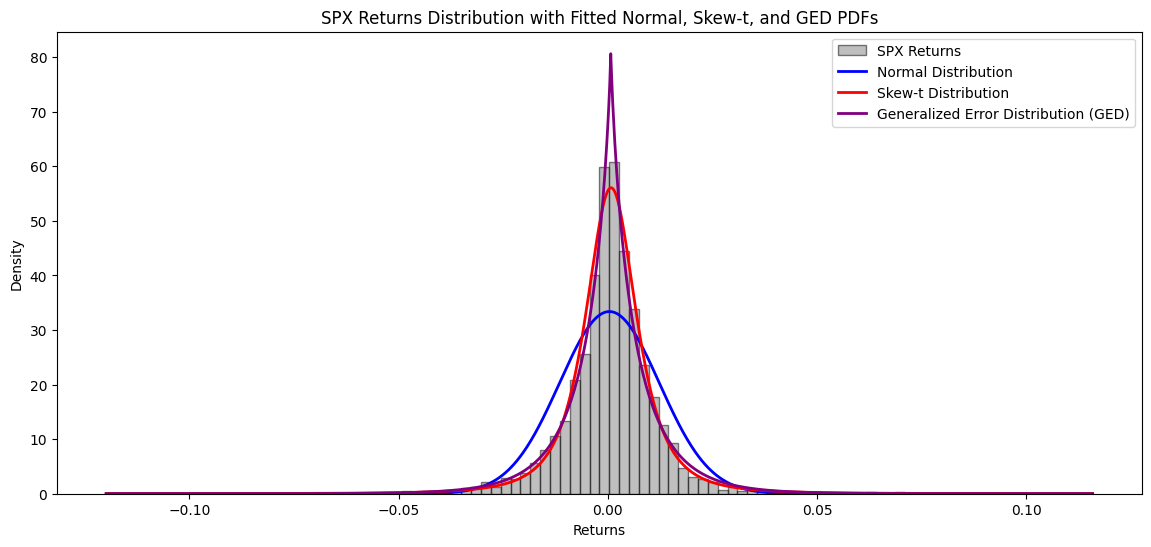

In [ ]:
plt.figure(figsize=(14, 6))
plt.hist(returns_SPX, bins=100, density=True, alpha=0.5, color='gray', edgecolor='black', label='SPX Returns')

# Generate x values for plotting the PDFs
x = np.linspace(returns_SPX.min(), returns_SPX.max(), 1000)

# Step 4: Fit the normal distribution and plot the PDF
mu, sigma = norm.fit(returns_SPX)
p_normal = norm.pdf(x, mu, sigma)
plt.plot(x, p_normal, 'blue', linewidth=2, label='Normal Distribution')

# Step 5: Fit the skew-t distribution and plot the PDF
df, loc, scale = t.fit(returns_SPX)
p_skew_t = t.pdf(x, df, loc, scale)
plt.plot(x, p_skew_t, 'red', linewidth=2, label='Skew-t Distribution')

# Step 6: Fit the GED using gennorm and plot the PDF
params_ged = gennorm.fit(returns_SPX)
p_ged = gennorm.pdf(x, *params_ged)
plt.plot(x, p_ged, 'purple', linewidth=2, label='Generalized Error Distribution (GED)')

# Customize the plot
plt.title('SPX Returns Distribution with Fitted Normal, Skew-t, and GED PDFs')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.show()